In [5]:
# set up modules
%matplotlib inline
import os
import shutil

from glob import glob

import cftime

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean

import intake
import pop_tools

import util

In [6]:
ds_djf_regional = xr.open_zarr('data/cesm-le-fields-djf-regional-timeseries.zarr')

ds.info()

xarray.Dataset {
dimensions:
	length = 3 ;
	member_id = 34 ;
	region = 3 ;
	time = 180 ;

variables:
	float64 Chl_surf(time, member_id, region) ;
		Chl_surf:cell_methods = time: mean ;
		Chl_surf:grid_loc = 3114 ;
		Chl_surf:long_name = Surface chlorophyll ;
		Chl_surf:units = mg/m^3 ;
	float64 IFRAC(time, member_id, region) ;
		IFRAC:cell_methods = time: mean ;
		IFRAC:grid_loc = 2110 ;
		IFRAC:long_name = Ice Fraction from Coupler ;
		IFRAC:units = fraction ;
	float64 KGP(time, length, member_id, region) ;
		KGP:long_name = Daily growth rate ;
		KGP:units = mm d$^{-1}$ ;
	float64 SST(time, member_id, region) ;
		SST:cell_methods = time: mean ;
		SST:grid_loc = 3111 ;
		SST:long_name = Potential Temperature ;
		SST:units = degC ;
	float64 length(length) ;
		length:long_name = Krill body length ;
		length:units = mm ;
	int64 member_id(member_id) ;
	<U14 region(region) ;
	int64 time(time) ;

// global attributes:
}

In [3]:
ds

<xarray.Dataset>
Dimensions:    (length: 3, member_id: 34, region: 3, time: 180)
Coordinates:
  * length     (length) float64 20.0 40.0 60.0
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
  * region     (region) <U14 'Southern Ocean' 'WAP & Atlantic' 'Indo-Pacific'
  * time       (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
Data variables:
    Chl_surf   (time, member_id, region) float64 dask.array<chunksize=(180, 34, 3), meta=np.ndarray>
    IFRAC      (time, member_id, region) float64 dask.array<chunksize=(180, 34, 3), meta=np.ndarray>
    KGP        (time, length, member_id, region) float64 dask.array<chunksize=(90, 3, 34, 3), meta=np.ndarray>
    SST        (time, member_id, region) float64 dask.array<chunksize=(180, 34, 3), meta=np.ndarray>

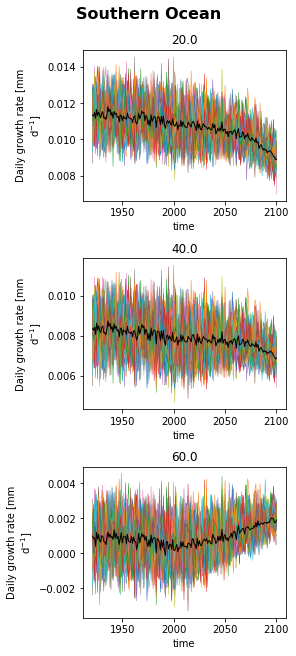

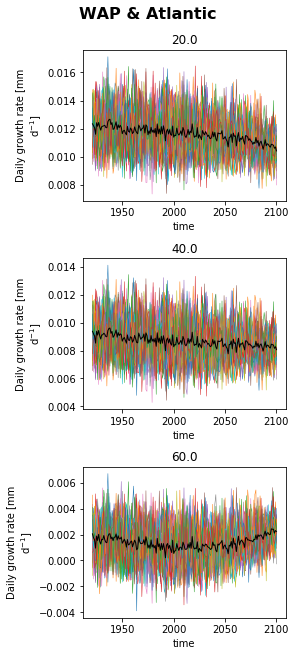

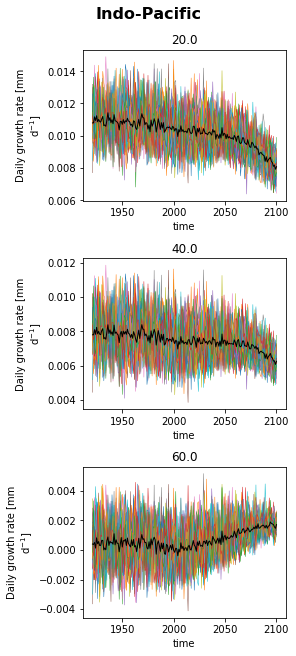

In [14]:
for plot_region in ds_djf_regional.region.values:

    nvar = len(ds_djf_regional.length)
    ncol = int(np.sqrt(nvar))
    nrow = int(nvar/ncol) + min(1, nvar%ncol)

    fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow),
                           constrained_layout=True)
    v = "KGP"
    
    for i, l in enumerate(ds_djf_regional.length.values):
        plt.axes(ax.ravel()[i])

        var = ds_djf_regional[v].sel(region=plot_region)
        var = var.sel(length=l)            
        for m_id in ds_djf_regional.member_id:
            var_i = var.sel(member_id=m_id)
            var_i.plot(linewidth=0.5)

        with xr.set_options(keep_attrs=True):            # applies the following only to the line below
            var.mean('member_id').plot(color='k', linewidth=1)
        plt.title(l)
    plt.suptitle(plot_region, fontsize=16, fontweight='bold')

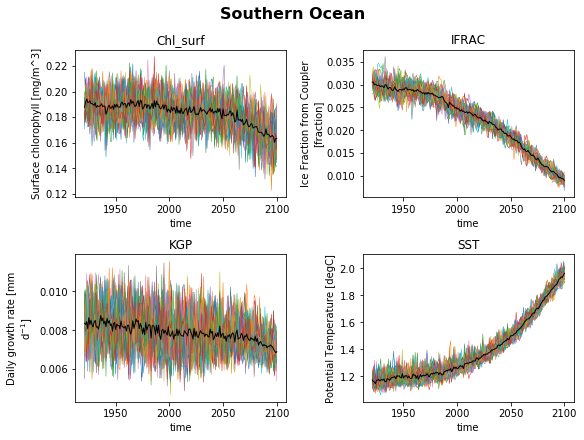

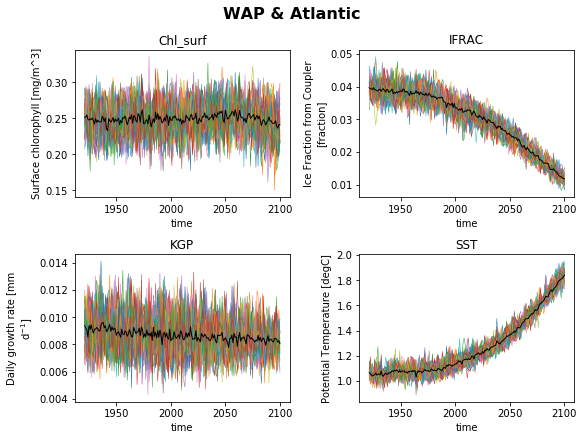

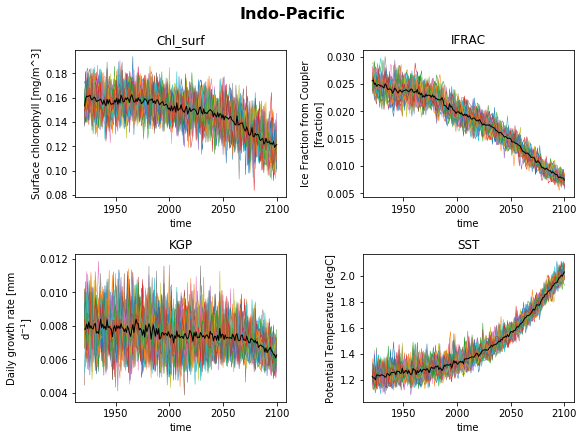

In [15]:
for plot_region in ds_djf_regional.region.values:

    nvar = len(ds_djf_regional.data_vars)
    ncol = int(np.sqrt(nvar))
    nrow = int(nvar/ncol) + min(1, nvar%ncol)

    fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow),
                           constrained_layout=True)

    for i, v in enumerate(ds_djf_regional.data_vars):
        plt.axes(ax.ravel()[i])

        var = ds_djf_regional[v].sel(region=plot_region)
        if 'length' in var.dims:
            var = var.sel(length=40.)            
        for m_id in ds_djf_regional.member_id:
            var_i = var.sel(member_id=m_id)
            var_i.plot(linewidth=0.5)

        with xr.set_options(keep_attrs=True):            
            var.mean('member_id').plot(color='k', linewidth=1)
        plt.title(v)
    plt.suptitle(plot_region, fontsize=16, fontweight='bold')

### Enumerate Function:

for index, item in enumerate(choices):

for i, v in enumerate(ds):